<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#대한민국에서-발생한-COVID-19-감염-사례(Case.csv)" data-toc-modified-id="대한민국에서-발생한-COVID-19-감염-사례(Case.csv)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>대한민국에서 발생한 COVID-19 감염 사례(Case.csv)</a></span></li><li><span><a href="#코로나-환자-역학-정보-(PatientInfo.csv)" data-toc-modified-id="코로나-환자-역학-정보-(PatientInfo.csv)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>코로나 환자 역학 정보 (PatientInfo.csv)</a></span></li><li><span><a href="#코로나-환자-현황-시계열-데이터-(Time.csv)" data-toc-modified-id="코로나-환자-현황-시계열-데이터-(Time.csv)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>코로나 환자 현황 시계열 데이터 (Time.csv)</a></span></li><li><span><a href="#연령별-코로나-확진자-현황-시계열-데이터-(TimeAge.csv)" data-toc-modified-id="연령별-코로나-확진자-현황-시계열-데이터-(TimeAge.csv)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>연령별 코로나 확진자 현황 시계열 데이터 (TimeAge.csv)</a></span></li><li><span><a href="#성별-기준-코로나-확진자-현황-시계열-데이터-(TimeGender.csv)" data-toc-modified-id="성별-기준-코로나-확진자-현황-시계열-데이터-(TimeGender.csv)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>성별 기준 코로나 확진자 현황 시계열 데이터 (TimeGender.csv)</a></span></li><li><span><a href="#도-단위-코로나-확진자-현황-시계열-데이터" data-toc-modified-id="도-단위-코로나-확진자-현황-시계열-데이터-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>도 단위 코로나 확진자 현황 시계열 데이터</a></span></li><li><span><a href="#지역별-위치-및-통계-자료-(Region.csv)" data-toc-modified-id="지역별-위치-및-통계-자료-(Region.csv)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>지역별 위치 및 통계 자료 (Region.csv)</a></span></li><li><span><a href="#지역-날씨-자료-(Weather.csv)" data-toc-modified-id="지역-날씨-자료-(Weather.csv)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>지역 날씨 자료 (Weather.csv)</a></span></li><li><span><a href="#네이버에서-검색된-키워드의-트렌드-데이터-(SearchTrend.csv)" data-toc-modified-id="네이버에서-검색된-키워드의-트렌드-데이터-(SearchTrend.csv)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>네이버에서 검색된 키워드의 트렌드 데이터 (SearchTrend.csv)</a></span></li><li><span><a href="#서울-유동인구-자료-(SeoulFloating.csv)" data-toc-modified-id="서울-유동인구-자료-(SeoulFloating.csv)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>서울 유동인구 자료 (SeoulFloating.csv)</a></span></li><li><span><a href="#정부-정잭-자료-(Policy.csv)" data-toc-modified-id="정부-정잭-자료-(Policy.csv)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>정부 정잭 자료 (Policy.csv)</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline
import folium
from folium.plugins import MarkerCluster


import warnings
warnings.filterwarnings('ignore')

C:\spyder\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## 대한민국에서 발생한 COVID-19 감염 사례(Case.csv)

* case_id : 감염 사례의 ID - region_code(5) + case_number(2), region_code는 Region.csv에서 확인 
* province : 특별시/광역시/도
* city : 시/군/구
* group : 집단 감염 여부(True가 집단감염, False가 집단감염 아님)
* inflection_case : 집단 감염일 경우의 집단 이름, '환자와의 접촉', '해외유입', 'etc'의 경우 집단 감염이 아님
* confirmed : 확인된 코로나 감염자 누적 번호
* latitude : 집단의 위도
* long : 집단의 경도

In [71]:
case = pd.read_csv('data/covid/Case.csv')
case 

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [73]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


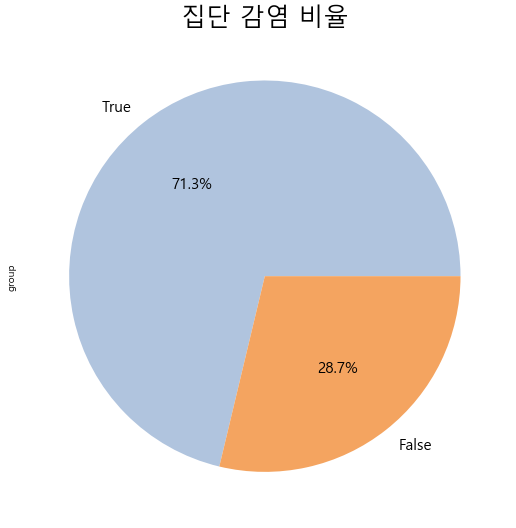

In [86]:
plt.figure(figsize=(10, 9))
case['group'].value_counts().plot.pie(autopct="%.1f%%", 
                                       colors=['lightsteelblue', 'sandybrown'],
                                      fontsize=15)
plt.title('집단 감염 비율', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

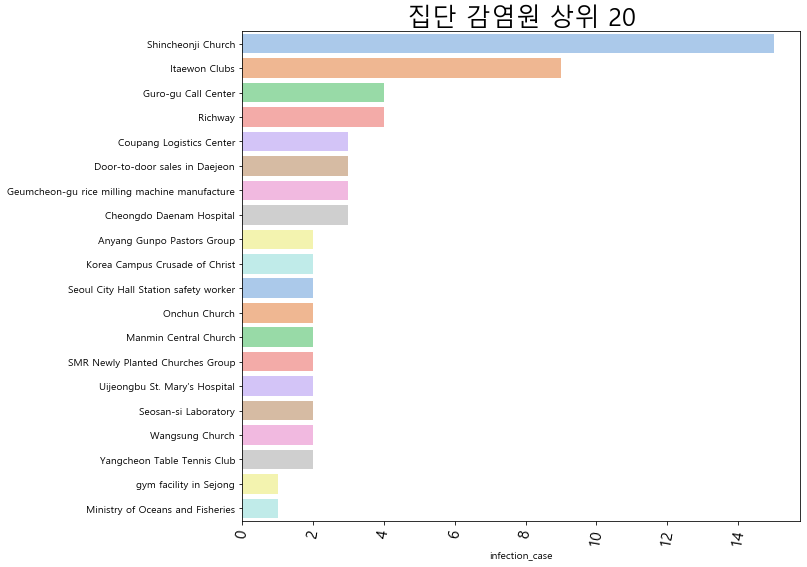

In [96]:
group = case.loc[case['group']==True]
group = group['infection_case'].value_counts().head(20)

plt.figure(figsize=(10, 9))
sns.barplot(y=group.index,
            x=group,
            palette='pastel')
plt.title('집단 감염원 상위 20', fontsize=25)
plt.xticks(rotation=80, fontsize=15)
plt.show()

In [80]:
import folium
import pandas as pd
import json
import re

geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str,
              data=case,
              columns=['city', 'confirmed'],
              fill_color='YlGn',
              key_on='feature.properties.name_eng')
map

In [82]:
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.2749065,127.0070014], zoom_start=7)
map.choropleth(geo_data=geo_str,
               data=case,
               columns = ['city', 'confirmed'],
               fill_color='YlGn',
               key_on = 'feature.properties.name_eng')
map

## 코로나 환자 역학 정보 (PatientInfo.csv)

* patient_id : 환자의 id - region_code(5) + patient_number(5)
(patient_number는 지방자치단체가 준 번호(local_number)와 KCDC에서 부여한 번호(global_num)의 두 가지 유형 존재)
* sex : 성별
* age : 연령대
* country : 환자의 국적
* province : 특별시/광역시/도
* city : 시/군/구
* inflection_case : 감염 사례
* inflection_by : 환자를 감염시킨 사람의 id (patient_id)
* contact_number : 사용자와의 연락처 수
* symptom_onset_date : 증상 시작 날짜
* confirmed_date : 확인 날짜
* released_date : 퇴원 날짜
* deaded_date : 사망 날짜
* state : isolated(병원에서 격리)/released(퇴원)/decased(사망)

In [14]:
patient = pd.read_csv('data/covid/PatientInfo.csv')
patient

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


## 코로나 환자 현황 시계열 데이터 (Time.csv)

* date : 날짜 YYYY-MM-DD
* time : 시간 (0=오전 12:00 / 16=오후 4시)
* test : 누적된 검사자 수
* negative : 누적된 음성 결과 수
* confirmed : 누적된 양성 결과 수
* released : 누적된 퇴원 환자 수
* deceaseed : 누적된 사망자 수

In [55]:
time = pd.read_csv('data/covid/Time.csv')
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [56]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


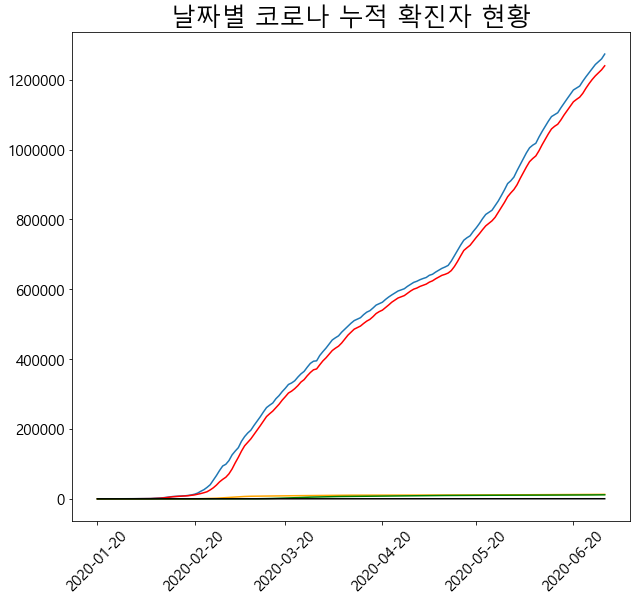

In [60]:
# 전체 데이터
plt.figure(figsize=(10, 9))
plt.title('날짜별 코로나 누적 확진자 현황', fontsize=25)
p1 = plt.plot(time['date'], time['test'])
p2 = plt.plot(time['date'], time['negative'], color='red')
p3 = plt.plot(time['date'], time['confirmed'], color='orange')
p4 = plt.plot(time['date'], time['released'], color='green')
p5 = plt.plot(time['date'], time['deceased'], color='black')
plt.xticks(['2020-01-20', '2020-02-20', '2020-03-20', '2020-04-20','2020-05-20', '2020-06-20'], 
           rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

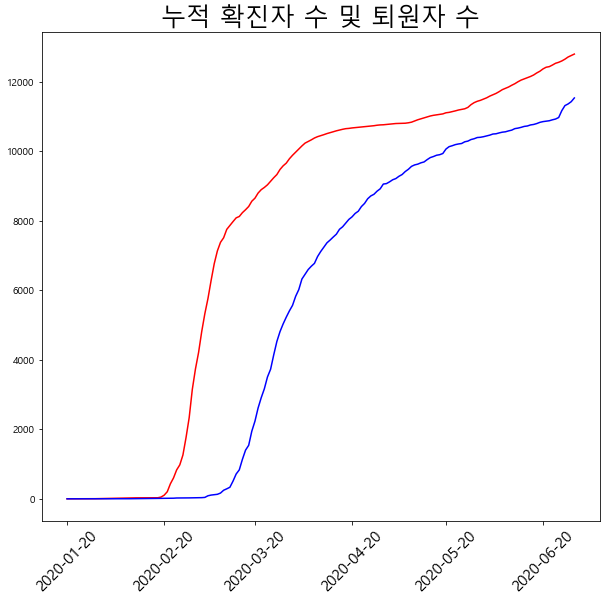

In [63]:
plt.figure(figsize=(10, 9))
plt.plot(time['date'], time['confirmed'], color='red')
plt.plot(time['date'], time['released'], color='blue')
plt.title('누적 확진자 수 및 퇴원자 수', fontsize=25)
plt.xticks(['2020-01-20', '2020-02-20', '2020-03-20', '2020-04-20','2020-05-20', '2020-06-20'], 
           rotation=45, fontsize=15)
plt.show()

## 연령별 코로나 확진자 현황 시계열 데이터 (TimeAge.csv)

* date : 날짜 YYYY-MM-DD (3월 2일부터 제시됨)
* time : 시간
* age : 환자의 연령대
* confirmed : 확인된 누적 확진자 수
* decased : 누적된 사망자 수

In [8]:
time_age = pd.read_csv('data/covid/TimeAge.csv')
time_age

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


## 성별 기준 코로나 확진자 현황 시계열 데이터 (TimeGender.csv)

* date : 날짜 YYYY-MM-DD
* time : 시간
* sex : 환자의 성별
* confirmed : 확인된 누적 확진자 수
* deceased : 확인된 누적 사망자 수

In [9]:
time_gender = pd.read_csv('data/covid/TimeGender.csv')
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


## 도 단위 코로나 확진자 현황 시계열 데이터

* date : 날짜 YYYY-MM-DD
* time : 시간
* province : 특별시/광역시/도
* confirmed : 도 내 누적 확진자 수 (2월 21부터 정확한 값, 그 전은 정확하지 않을 수 있음)
* released : 도 내 누적 퇴원자 수 (3월 5일부터 정확한 값, 그 전은 정확하지 않을 수 있음)
* deceased : 도 내 누적 사망자 수 (3월 5일부터 정확한 값, 그 전은 정확하지 않을 수 있음)

In [64]:
time_pro = pd.read_csv('data/covid/TimeProvince.csv')
time_pro

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


In [65]:
time_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2771 non-null   object
 1   time       2771 non-null   int64 
 2   province   2771 non-null   object
 3   confirmed  2771 non-null   int64 
 4   released   2771 non-null   int64 
 5   deceased   2771 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 130.0+ KB


In [ ]:
seoul = time_pro.loc[time_pro['province'] == 'Seoul']


## 지역별 위치 및 통계 자료 (Region.csv)

* code : 지역 코드
* province : 특별시/광역시/도
* city : 시/군/구
* latitude : 위도
* longitude : 경도
* elementary_school_count : 초등학교 수
* kindergarten_count : 유치원 수
* university_count : 대학 수
* academy_ratio : 학원 비율
* elderly_population_ratio : 노인 인구 비율
* elderly_alone_ratio : 독거 노인 비율
* narsing_home_count : 요양원 수

In [11]:
region = pd.read_csv('data/covid/Region.csv')
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


## 지역 날씨 자료 (Weather.csv)

* code : 지역 코드
* province : 특별시/광역시/도
* date : 날짜 YYYY-MM-DD
* avg_temp : 평균 온도
* min_temp : 최저 온도
* max_temp : 최고 온도
* precipitation : 일일 강수량
* max_wind_speed : 최대 풍속
* most_wid_direction : 가장 번한 풍향
* avg_relative_humidity : 평균 상대 습도

In [12]:
weather = pd.read_csv('data/covid/Weather.csv')
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


## 네이버에서 검색된 키워드의 트렌드 데이터 (SearchTrend.csv)

* date : 날짜 YYYY-MM-DD
* cold : 검색 볼륨(기간의 가장 높은 검색 볼륨을 100으로 설정해 상대 값 의미)
* flu : 독감 검색량(상대 값)
* pneumonia : 폐렴 검색량(상대 값)
* coronavirus : 코로나바이러스 검색량(상대 값)

In [13]:
search_trend = pd.read_csv('data/covid/SearchTrend.csv')
search_trend

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


## 서울 유동인구 자료 (SeoulFloating.csv)

* date : 날짜 YYYY-MM-DD
* hour : 시
* birth_year : 유동인구의 출생연도
* sex : 유동인구의 성별
* province : 특별시/광역시/도
* city : 시/군/구
* fp_num : 유동 모집단 수

In [14]:
seoul_floating = pd.read_csv('data/covid/SeoulFloating.csv')
seoul_floating

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


## 정부 정잭 자료 (Policy.csv)

* policy_id : 정책의 id
* country : 국가
* type : 정책 유형
* gov_policy : 정부 정책
* detail : 정책 상세 내역
* start_date : 정책 시작 날짜
* end_date : 정책 종료 날짜

In [15]:
policy = pd.read_csv('data/covid/Policy.csv')
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN
